In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)  # sets the max
sns.set_style("whitegrid")

df_mat = pd.read_csv("data/student-mat.csv", sep=";")
df_mat["course"] = "math"

df_por = pd.read_csv("data/student-por.csv", sep=";")
df_por["course"] = "portuguese"

df_org = pd.concat([df_mat, df_por], ignore_index=True) # is saved as "all_survery_answers.csv" in data/

df_org.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math


# Feature Engineering

## Average Grade

In [29]:
# AVG grade of each student
grad_mean = (df_org.G1 + df_org.G2 + df_org.G3) / 3
df_org["G_mean"] = grad_mean

## Social Class (same socioeconomic status)

### Old approach

we are dividing social class into 3 groups; upper (U), middle (M) and lower (L) class.

- Parents educational level is the strongest proxy for social class
- Parents job is the second strongest proxy
- health???
- freetime after school
- internet
- extra-curricular activities
- family size

In [30]:
# # Inferring social class based on parents education
# print(
#     f"{df[(df['Medu'] == 4) & (df['Fedu'] == 4)].shape[0]} rows where both mother and father has higher education"
# )
# print(
#     f"{df[(df['Medu'] == 4) ^ (df['Fedu'] == 4)].shape[0]} rows where either mother or father has higher education (bot not both)"
# )
# print(
#     f"{df[(df['Medu'] < 4) & (df['Fedu'] < 4)].shape[0]} rows where both the mother or father does not have a higher education"
# )

In [31]:
# df_altered = df.copy()

# df_altered["famsize"] = df_altered["famsize"].map(
#     {"GT3": 1, "LE3": 2}
# )  # 1 = Greater than 3, 2 = Less than 3
# df_altered["Pstatus"] = df_altered["Pstatus"].map(
#     {"A": 1, "T": 2}
# )  # 1 = Apart, 2 = Together
# df_altered["internet"] = df_altered["internet"].map({"no": 0, "yes": 1})

# # this approach weights the features that are not on a ordinal scale
# social_class_features = [
#     "famsize",
#     "Pstatus",
#     "internet",
#     "Medu",
#     "Fedu",
#     "health",
#     "freetime",
#     "goout", # include ???
# ]
# df_altered["socio_economic_score"] = df_altered[social_class_features].sum(axis=1)

# df_altered['socio_economic_score'].value_counts().sort_index().plot(kind="bar", figsize=(15, 5))
# plt.title("Socio economic score Distribution")
# plt.show()

### Agreed approach

In [32]:
df_social_status = df_org.copy()

df_social_status['internet'] = df_social_status['internet'].map({'no': 0, 'yes': 1})
df_social_status['traveltime'] = df_social_status['traveltime'].apply(lambda x: 0 if x >= 3 else 1)
df_social_status['address'] = df_social_status['address'].map({'U': 1, 'R': 0})
df_social_status['Mjob'] = df_social_status['Mjob'].apply(lambda x: 0 if x == "at_home" else 1)
df_social_status['Fjob'] = df_social_status['Fjob'].apply(lambda x: 0 if x == "at_home" else 1)
df_social_status['Medu'] = df_social_status['Medu'].apply(lambda x: 0 if x < 3 else 1)
df_social_status['Fedu'] = df_social_status['Fedu'].apply(lambda x: 0 if x < 3 else 1)

social_class_features = ['internet', 'traveltime', 'address', 'Mjob', 'Fjob', 'Medu', 'Fedu']

df_social_status['social_economic_score'] = df_social_status[social_class_features].sum(axis=1)
df_social_status['social_class'] = df_social_status['social_economic_score'].apply(lambda x: "higher_economic_class" if x >= 4 else "lower_economic_class")

df_social_status

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course,G_mean,social_economic_score,social_class
0,GP,F,18,1,GT3,A,1,1,0,1,course,mother,1,2,0,yes,no,no,no,yes,yes,0,no,4,3,4,1,1,3,6,5,6,6,math,5.666667,5,higher_economic_class
1,GP,F,17,1,GT3,T,0,0,0,1,course,father,1,2,0,no,yes,no,no,no,yes,1,no,5,3,3,1,1,3,4,5,5,6,math,5.333333,4,higher_economic_class
2,GP,F,15,1,LE3,T,0,0,0,1,other,mother,1,2,3,yes,no,yes,no,yes,yes,1,no,4,3,2,2,3,3,10,7,8,10,math,8.333333,4,higher_economic_class
3,GP,F,15,1,GT3,T,1,0,1,1,home,mother,1,3,0,no,yes,yes,yes,yes,yes,1,yes,3,2,2,1,1,5,2,15,14,15,math,14.666667,6,higher_economic_class
4,GP,F,16,1,GT3,T,1,1,1,1,home,father,1,2,0,no,yes,yes,no,yes,yes,0,no,4,3,2,1,2,5,4,6,10,10,math,8.666667,6,higher_economic_class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,0,GT3,T,0,1,1,1,course,mother,1,3,1,no,no,no,yes,no,yes,1,no,5,4,2,1,2,5,4,10,11,10,portuguese,10.333333,5,higher_economic_class
1040,MS,F,18,1,LE3,T,1,0,1,1,course,mother,1,2,0,no,yes,no,no,yes,yes,1,no,4,3,4,1,1,1,4,15,15,16,portuguese,15.333333,6,higher_economic_class
1041,MS,F,18,1,GT3,T,0,0,1,1,course,mother,1,2,0,no,no,no,yes,yes,yes,0,no,1,1,1,1,1,5,6,11,12,9,portuguese,10.666667,4,higher_economic_class
1042,MS,M,17,1,LE3,T,1,0,1,1,course,mother,1,1,0,no,no,no,no,no,yes,1,no,2,4,5,3,4,2,6,10,10,10,portuguese,10.000000,6,higher_economic_class


In [33]:
# add the engineered feature to the original dataframe and save it:
# df_org['social_economic_score'] = df_social_status['social_economic_score']
# df_org['social_class'] = df_social_status['social_class']

df_org.to_csv("data/all_survey_answers.csv")

# EDA

In [34]:
numeric_features = df.select_dtypes("number")
features = df.columns

NameError: name 'df' is not defined

### Correlation Analysis

<Axes: >

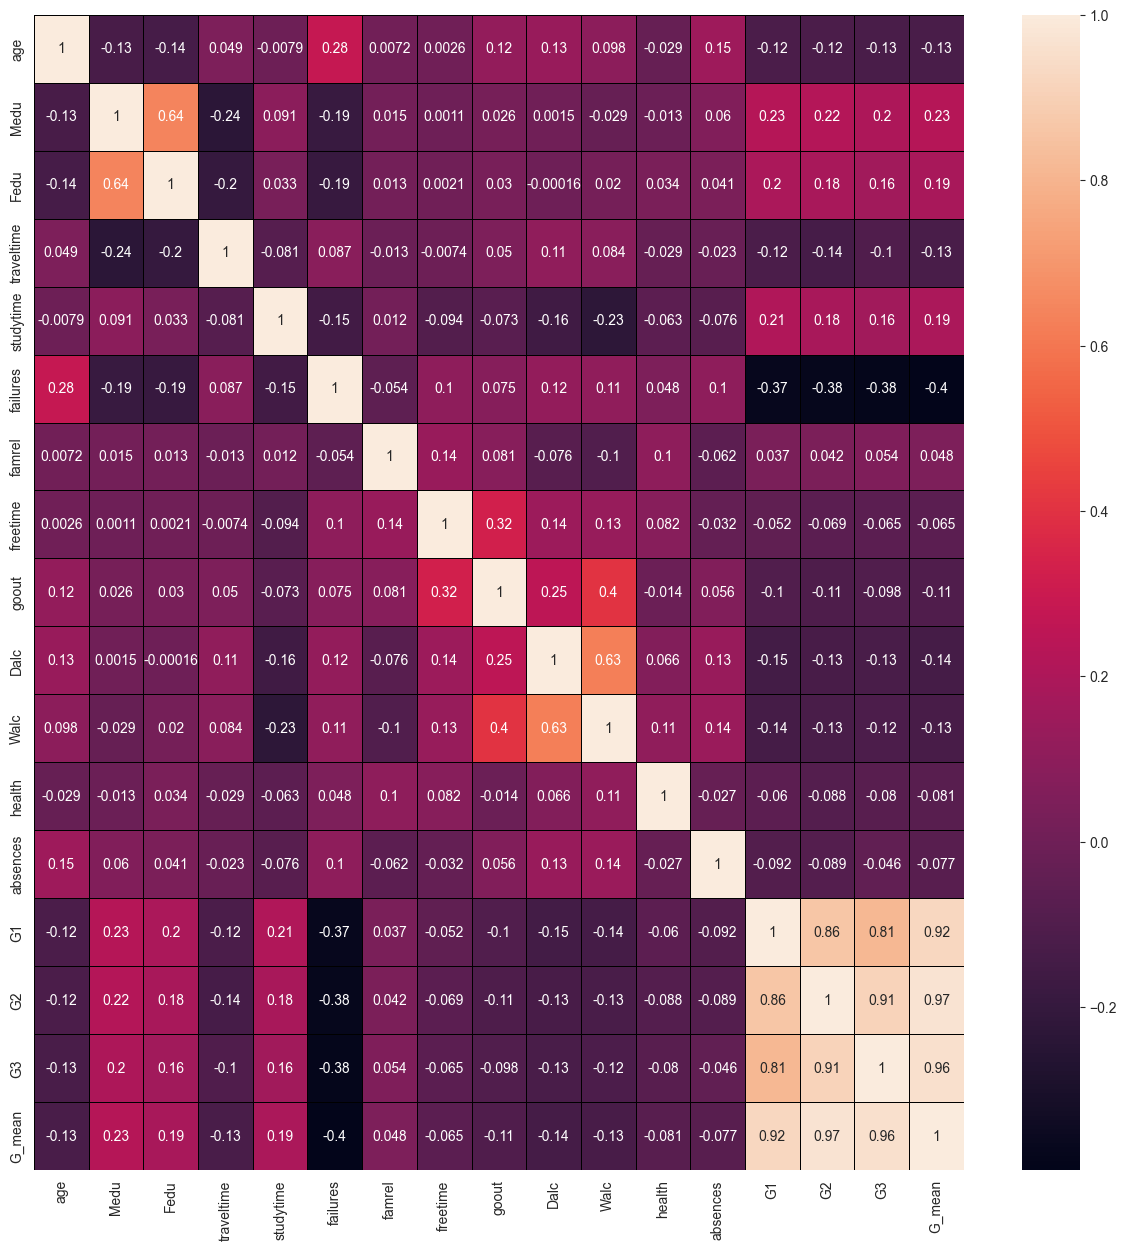

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(
    numeric_features.corr(method="pearson"),
    annot=True,
    cmap="rocket",
    linewidths=0.5,
    linecolor="black",
)

## Sensitive Variables

### Socio economic status

<Axes: xlabel='social_class', ylabel='G_Mean'>

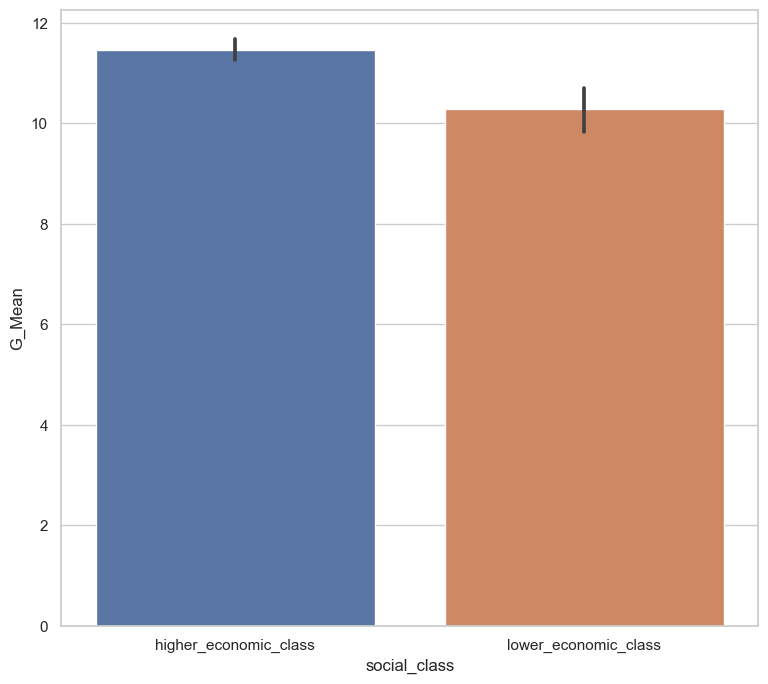

In [ ]:
sns.barplot(x="social_class", y="G_Mean", data=df_social_status)

<Axes: xlabel='G_Mean', ylabel='Count'>

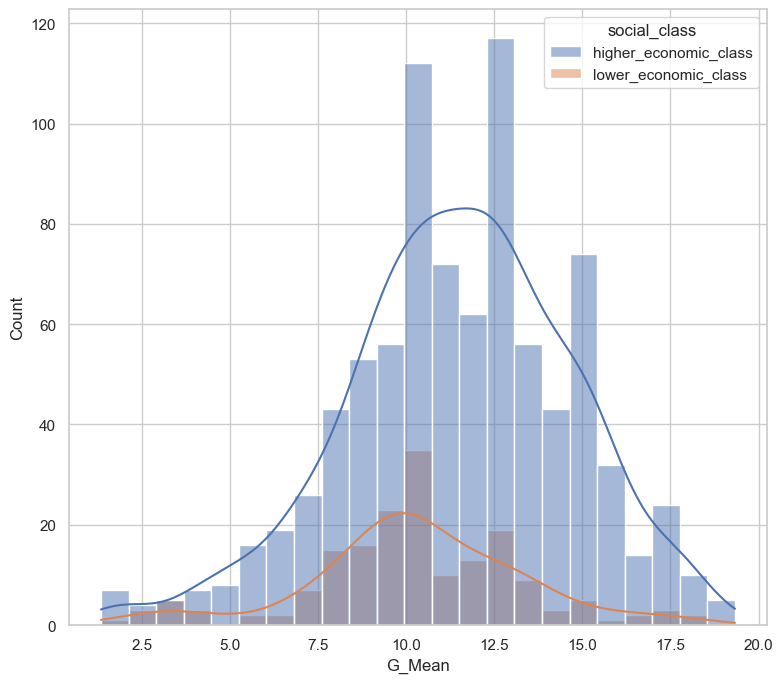

In [ ]:
sns.histplot(x="G_Mean", hue="social_class", data=df_social_status, kde=True)

### AGE

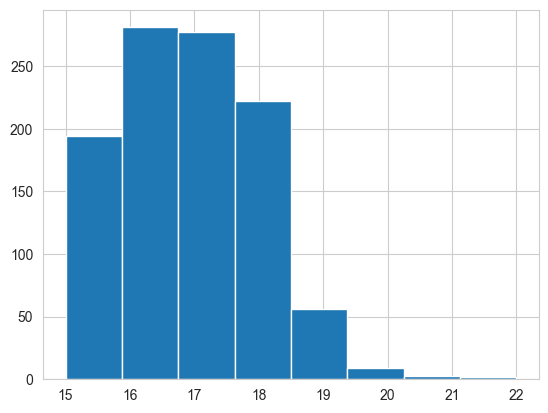

In [ ]:
plt.hist(df["age"], bins=8)
plt.show()

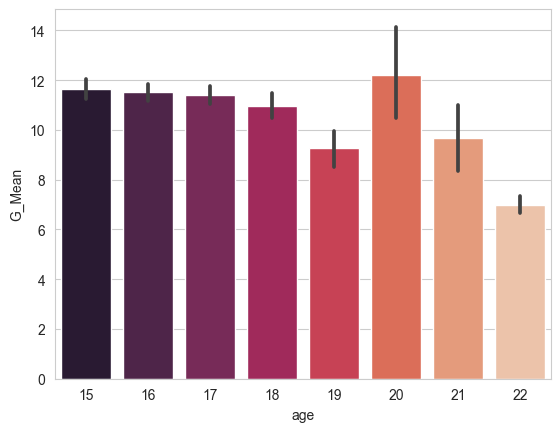

In [ ]:
sns.barplot(data=df, x="age", y="G_Mean", palette="rocket", errorbar=("ci", 95))
plt.show()


<Axes: xlabel='age'>

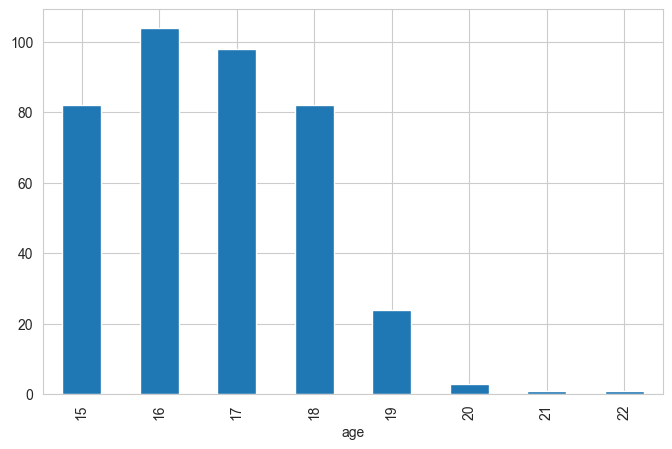

In [ ]:
df.age.value_counts().sort_index().plot(kind="bar", figsize=(8, 5))

<Axes: xlabel='age', ylabel='studytime'>

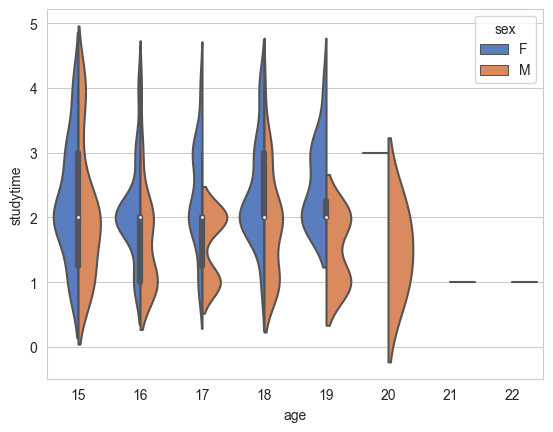

In [ ]:
sns.violinplot(x="age", y="studytime", hue="sex", data=df, palette="muted", split=True)


In [ ]:
sns.violinplot(x="studytime", hue="sex")

ValueError: Could not interpret input 'studytime'

<Axes: xlabel='age', ylabel='failures'>

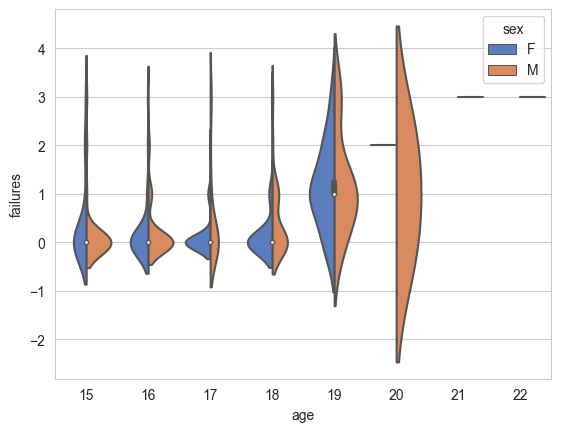

In [ ]:
sns.violinplot(x="age", y="failures", hue="sex", data=df, palette="muted", split=True)


### SEX

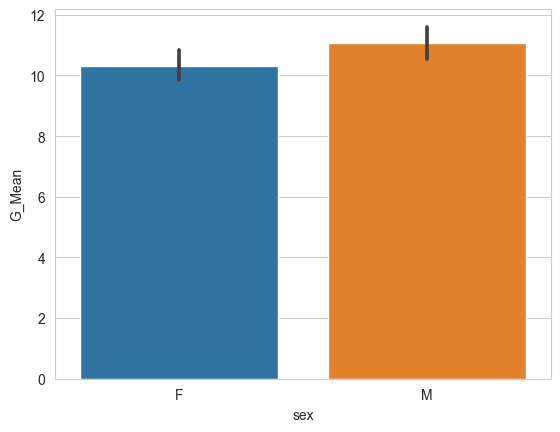

In [ ]:
sns.barplot(x="sex", y="G_Mean", data=df)
plt.show()

In [ ]:
display(df.groupby("sex").G1.mean())
display(df.groupby("sex").G2.mean())
display(df.groupby("sex").G3.mean())
display(df.groupby("sex").G_Mean.mean())


sex
F    10.620192
M    11.229947
Name: G1, dtype: float64

sex
F    10.389423
M    11.074866
Name: G2, dtype: float64

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

sex
F    10.325321
M    11.073084
Name: G_Mean, dtype: float64

Males are on average getting a higher grade than females

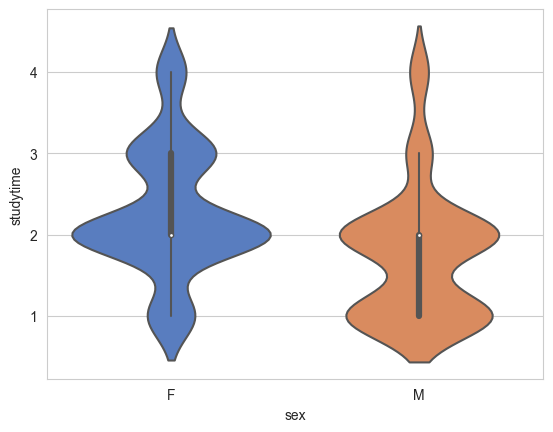

In [ ]:
# sex vs studytime
sns.violinplot(x="sex", y="studytime", data=df, palette="muted", split=True)
plt.show()

Female tend to study more than males

## Non-sensitive variables

In [ ]:
df_mat.shape[0]

395

In [ ]:
df_mat[df_mat['G3'] < 13].shape[0]

264

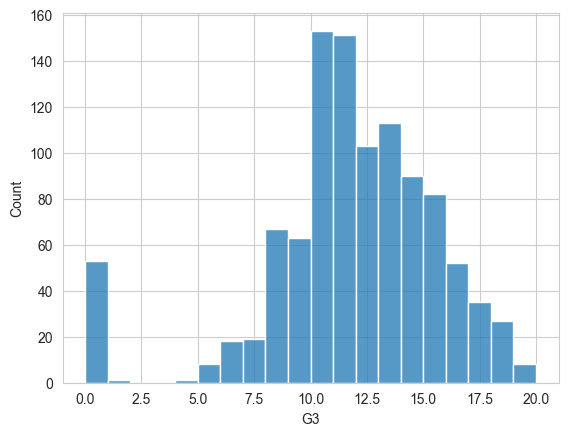

In [ ]:
sns.histplot(x="G3",data=df, bins=20)
plt.show()

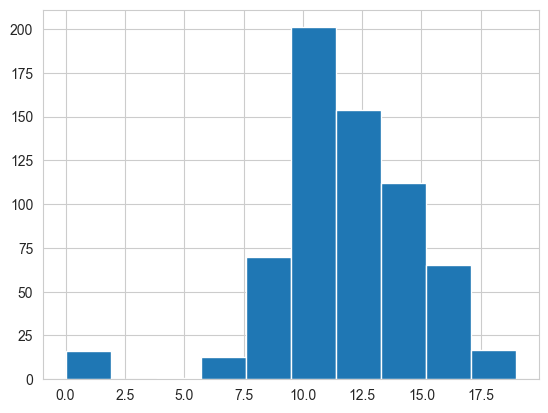

In [ ]:
plt.hist(df_por['G3'])
plt.show()

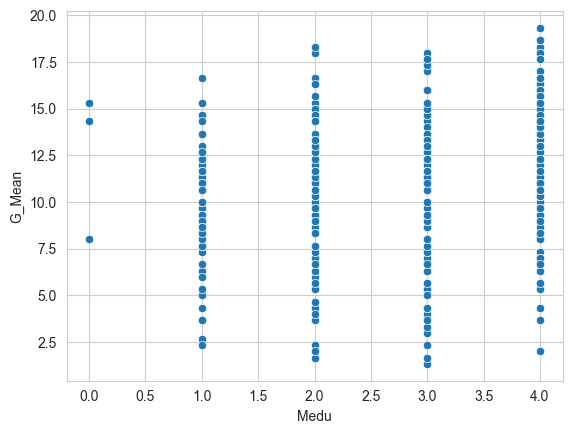

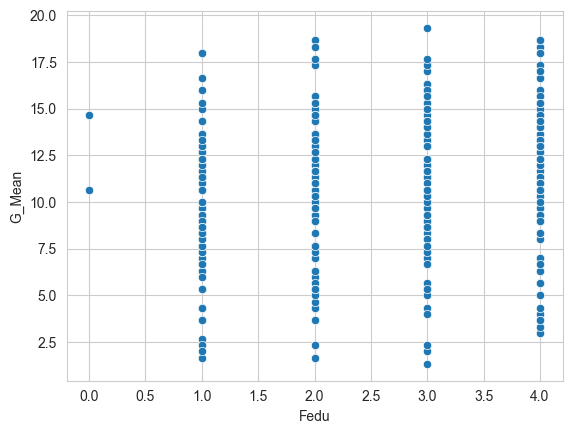

In [ ]:
sns.scatterplot(x="Medu", y="G_Mean", data=df)
plt.show()
sns.scatterplot(x="Fedu", y="G_Mean", data=df)
plt.show()